## G2M insight for Cab Investment firm

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt

### Loading Datasets from GitHub

In [5]:
cab_data = pd.read_csv('https://raw.githubusercontent.com/HarikaReddyB/DataSets/main/Cab_Data.csv')
city_data = pd.read_csv('https://raw.githubusercontent.com/HarikaReddyB/DataSets/main/City.csv')
Customer_id = pd.read_csv('https://raw.githubusercontent.com/HarikaReddyB/DataSets/main/Customer_ID.csv')
Transaction_id = pd.read_csv('https://raw.githubusercontent.com/HarikaReddyB/DataSets/main/Transaction_ID.csv')

### cab_data (understanding each dataset)

In [3]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [6]:
from datetime import datetime, timedelta

def convert_date(date_number):
    converted_date = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + date_number - 2)
    formatted_date = converted_date.strftime('%Y-%m-%d')
    return formatted_date

In [7]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x:convert_date(x))

In [8]:
cab_data.shape

(359392, 7)

In [9]:
cab_data.head(15)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [10]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [11]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


### city_data

In [12]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [13]:
city_data.shape

(20, 3)

In [14]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [15]:
city_data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [16]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [17]:
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


 ### Customer_id

In [18]:
Customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [19]:
Customer_id.shape

(49171, 4)

In [20]:
Customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [21]:
Customer_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [22]:
Customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [23]:
Customer_id

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


### Transactions data

In [24]:
Transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [25]:
Transaction_id.shape

(440098, 3)

In [26]:
Transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [27]:
Transaction_id.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [28]:
Transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [29]:
Transaction_id

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


### Merging the data

In [30]:
#making the copy of each data to avoid any misplace of data.

cab_data_copy = cab_data
city_data_copy = city_data
Customer_id_copy = Customer_id
Transaction_id_copy = Transaction_id

In [31]:
#checking for duplicate values before merging:

display(cab_data[cab_data.duplicated()])
display(city_data[city_data.duplicated()])
display(Customer_id[Customer_id.duplicated()])
display(Transaction_id[Transaction_id.duplicated()])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


,City,Population,Users


,Customer ID,Gender,Age,Income (USD/Month)


,Transaction ID,Customer ID,Payment_Mode


#### Hence there is no duplicate and missing data in given datasets, we can proceed with merging

In [32]:
#merging the tables

Merged_data_set= cab_data.merge(Transaction_id, on='Transaction ID').merge(Customer_id, on='Customer ID').merge(city_data, on='City')

In [33]:
Merged_data_set

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


In [34]:
print(Merged_data_set.isnull().sum())

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64


In [35]:
Merged_data_set['Profit'] = Merged_data_set['Price Charged'] - Merged_data_set['Cost of Trip']

In [36]:
# extract year, month and day into separate columns
Merged_data_set['Date of Travel'] = pd.to_datetime(Merged_data_set['Date of Travel'], format='%Y-%m-%d')
Merged_data_set ['year'] = Merged_data_set ['Date of Travel'].dt.year
Merged_data_set ['month'] = Merged_data_set ['Date of Travel'].dt.month
Merged_data_set ['day'] = Merged_data_set ['Date of Travel'].dt.day

In [37]:
Merged_data_set

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,year,month,day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150,2016,1,8
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772,2018,7,21
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480,2018,11,23
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660,2016,1,6
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808,2018,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001",143.6180,2018,3,3
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001",23.0464,2018,4,13
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001",-5.8540,2018,7,6
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001",-6.0900,2018,8,2


In [38]:
Merged_data_set.shape

(359392, 18)

In [39]:
#understanding and correcting the datatype:
Col_to_convert = ["Company","City","Payment_Mode","Gender"]
for col in Col_to_convert :
    Merged_data_set[col] = Merged_data_set [col].astype('category')

In [40]:
Col_to_convert = ["Population","Users"]
for col in Col_to_convert :
    Merged_data_set[col] = Merged_data_set [col].str.replace(',', '').astype('int64')

In [41]:
Merged_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  category      
 3   City                359392 non-null  category      
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  category      
 9   Gender              359392 non-null  category      
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

### EDA Aanalysis:

In [42]:
pink_cab_data= Merged_data_set [Merged_data_set ['Company'] == 'Pink Cab']
yellow_cab_data= Merged_data_set [Merged_data_set ['Company'] == 'Yellow Cab']

In [43]:
pink_cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,year,month,day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,57.315,2016,1,8
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,23.666,2016,1,6
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,814885,24701,25.096,2018,10,27
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,27.568,2016,1,2
11,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,25.798,2016,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359332,10200082,2017-07-23,Pink Cab,WASHINGTON DC,20.23,347.58,218.484,52425,Cash,Male,58,10737,418859,127001,129.096,2017,7,23
359346,10262863,2017-11-19,Pink Cab,WASHINGTON DC,4.44,61.95,50.616,51257,Card,Male,39,15247,418859,127001,11.334,2017,11,19
359356,10417014,2018-12-02,Pink Cab,WASHINGTON DC,40.95,565.07,434.070,51257,Card,Male,39,15247,418859,127001,131.000,2018,12,2
359358,10197277,2017-07-23,Pink Cab,WASHINGTON DC,32.64,375.27,368.832,51510,Card,Female,18,6855,418859,127001,6.438,2017,7,23


In [44]:
pink_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84711 entries, 0 to 359363
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      84711 non-null  int64         
 1   Date of Travel      84711 non-null  datetime64[ns]
 2   Company             84711 non-null  category      
 3   City                84711 non-null  category      
 4   KM Travelled        84711 non-null  float64       
 5   Price Charged       84711 non-null  float64       
 6   Cost of Trip        84711 non-null  float64       
 7   Customer ID         84711 non-null  int64         
 8   Payment_Mode        84711 non-null  category      
 9   Gender              84711 non-null  category      
 10  Age                 84711 non-null  int64         
 11  Income (USD/Month)  84711 non-null  int64         
 12  Population          84711 non-null  int64         
 13  Users               84711 non-null  int64    

In [45]:
pink_cab_data.shape

(84711, 18)

In [46]:
yellow_cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,year,month,day
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018,7,21
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018,11,23
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018,4,21
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701,50.8912,2018,5,4
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701,210.0920,2016,9,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,143.6180,2018,3,3
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,23.0464,2018,4,13
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,-5.8540,2018,7,6
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,-6.0900,2018,8,2


In [47]:
yellow_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274681 entries, 1 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      274681 non-null  int64         
 1   Date of Travel      274681 non-null  datetime64[ns]
 2   Company             274681 non-null  category      
 3   City                274681 non-null  category      
 4   KM Travelled        274681 non-null  float64       
 5   Price Charged       274681 non-null  float64       
 6   Cost of Trip        274681 non-null  float64       
 7   Customer ID         274681 non-null  int64         
 8   Payment_Mode        274681 non-null  category      
 9   Gender              274681 non-null  category      
 10  Age                 274681 non-null  int64         
 11  Income (USD/Month)  274681 non-null  int64         
 12  Population          274681 non-null  int64         
 13  Users               274681 no

#### 1. What is the average fare for each cab company, and how does it compare to the competition?

In [56]:
average_fare_by_company = Merged_data_set.groupby("Company")["Price Charged"].mean()

print (average_fare_by_company)

Company
Pink Cab      310.800856
Yellow Cab    458.181990
Name: Price Charged, dtype: float64


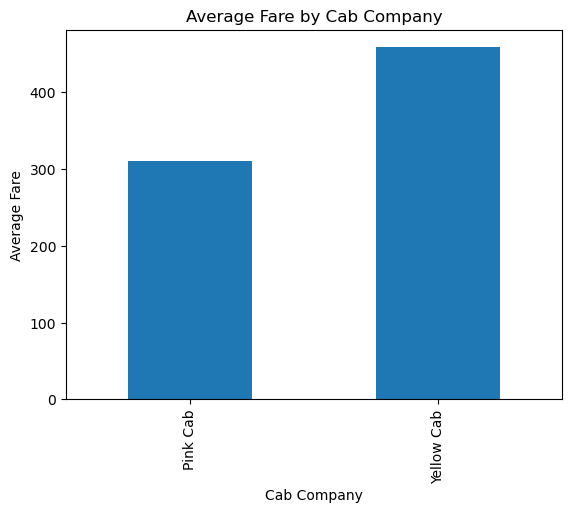

In [57]:
# Plotting the average fare for each cab company as a bar plot

average_fare_by_company.plot(kind="bar")

# Add labels and title to the plot
plt.xlabel("Cab Company")
plt.ylabel("Average Fare")
plt.title("Average Fare by Cab Company")

plt.show()

* The above plot shows the average fare charged by each cab company, with Yellow cab company having a higher average fare than Pink cab Company.

#### 2.What is the average wait time for each cab company, and how does it vary by time of day and day of the week?

In [80]:
#merging the dataset to get day of week profit.

Merged_data_set['Day of Week'] = Merged_data_set['Date of Travel'].dt.dayofweek
avg_profit_by_day = Merged_data_set.groupby('Day of Week')['Profit'].mean()


In [79]:
# Calculate average profit by pickup time
avg_profit_by_pickup_time = Merged_data_set.groupby(Merged_data_set['Date of Travel'].dt.time)['Profit'].mean()


print("Pickup Time")
print(avg_profit_by_pickup_time)

# Calculate average profit by day of the week
avg_profit_by_day = Merged_data_set.groupby(Merged_data_set['Date of Travel'].dt.day_name())['Profit'].mean()

print("Day of Week")
print(avg_profit_by_day)


Pickup Time
Date of Travel
00:00:00    137.253198
Name: Profit, dtype: float64
Day of Week
Date of Travel
Friday       145.979209
Monday       117.864376
Saturday     144.156225
Sunday       157.005786
Thursday     115.493170
Tuesday      117.842108
Wednesday    116.719876
Name: Profit, dtype: float64


<AxesSubplot:xlabel='Date of Travel-Date of Travel', ylabel='Company'>

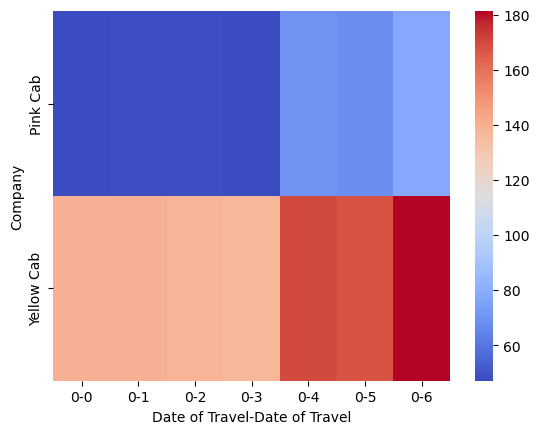

In [54]:
# Convert the "Date of Travel" column to a datetime.
Merged_data_set['Date of Travel'] = pd.to_datetime(Merged_data_set['Date of Travel'])

# Group the data 
groups = Merged_data_set.groupby([Merged_data_set['Company'], Merged_data_set['Date of Travel'].dt.hour, Merged_data_set['Date of Travel'].dt.dayofweek])

# Calculate the average wait time for each group
avg_wait_time = groups['Price Charged'].mean() - groups['Cost of Trip'].mean()


# Reshape the data to have cab company as columns, time of day as rows, and day of the week as levels in each row
avg_wait_time = avg_wait_time.unstack(level=0).transpose()


# Plot a heat map using the reshaped data, in which each cell is colored based on the average wait time
sns.heatmap(avg_wait_time, cmap='coolwarm')

* From this heatmap, it shows that average profit by pickup time and day of the week and helps in understanding the profitability of the cab service by different time periods.

#### 3.Are there any trends in the transaction data based on the time of year (e.g. summer, winter)?

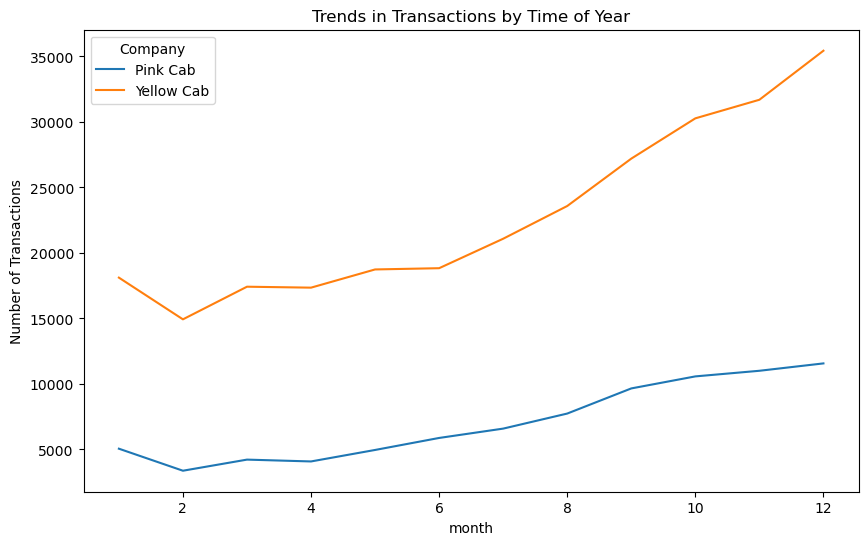

In [12]:
# Group the data by month and cab company and calculating the total transactions
monthly_transactions = Merged_data_set.groupby(['month', 'Company'])['Transaction ID'].count().reset_index()

# Pivot the data to create a dataframe with the cab companies as columns and the months as rows
monthly_transactions_pivot = monthly_transactions.pivot(index='month', columns='Company', values='Transaction ID')

# Plot the trends in a line graph
monthly_transactions_pivot.plot(kind='line', figsize=(10, 6))


plt.title('Trends in Transactions by Time of Year')
plt.xlabel('month')
plt.ylabel('Number of Transactions')

plt.show()

* after analyzing the trends, yellow cab company has better monthly transactions than pink cab company

#### 4.What is the distribution of cab usage across different age groups, and are there any trends over time?

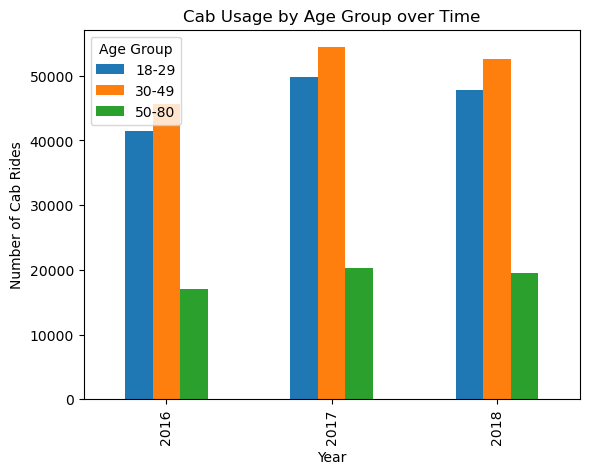

In [13]:
# define the bin edges and labels for the age groups.
bins = [18, 30, 50, 80]
labels = ['18-29', '30-49', '50-80'] 
Merged_data_set['Age Group'] = pd.cut(Merged_data_set['Age'], bins=bins, labels=labels)


# Group the data by age group and year-month of travel
age_group_data = Merged_data_set.groupby(["Age Group", "year"]).size().reset_index(name="Count")

# Pivot the data to make the age groups as columns and years as rows
age_group_data_pivot = age_group_data.pivot(index="year", columns="Age Group", values="Count")

# Create a stacked bar chart
ax = age_group_data_pivot.plot(kind='bar', stacked=False)

# Set the chart title and axis labels
ax.set_title('Cab Usage by Age Group over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Cab Rides')

plt.show()


* Throughout the 3 years of span i.e 2016-2018, the Age group of 30-49 has used maximum cabs more than other age groups.

#### 5. How frequently do customers use different payment methods when taking cab rides?

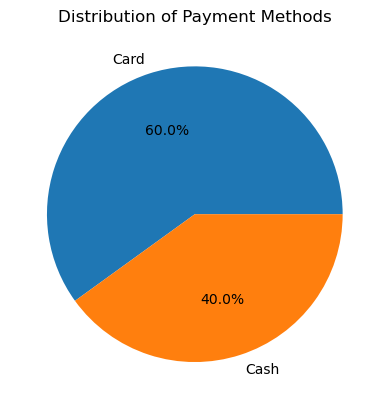

In [14]:
# Group the data by payment mode and calculate the count of each payment mode
payment_mode_data = Merged_data_set.groupby('Payment_Mode')['Transaction ID'].count()

# Create a pie chart to visualize the distribution of payment methods
plt.pie(payment_mode_data, labels=payment_mode_data.index, autopct='%1.1f%%')
plt.title('Distribution of Payment Methods')
plt.show()

* Maximum cab users are preferring to pay the cab fair through cards.

#### 6. Which city has the highest number of cab users?

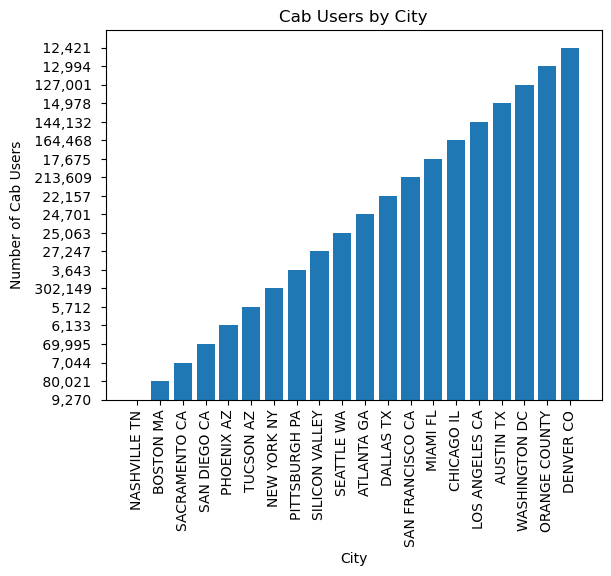

In [15]:
# Sort cities by number of cab users
city_data = city_data.sort_values('Users', ascending=False)

# Create bar chart of cab users by city
plt.bar(city_data['City'], city_data['Users'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of Cab Users')
plt.title('Cab Users by City')
plt.show()

 * From the above graph its clear that city "DENVER CO" has maximum cab users compared others 

#### 7. Which cab company has the highest overall revenue during the time period of the data set?

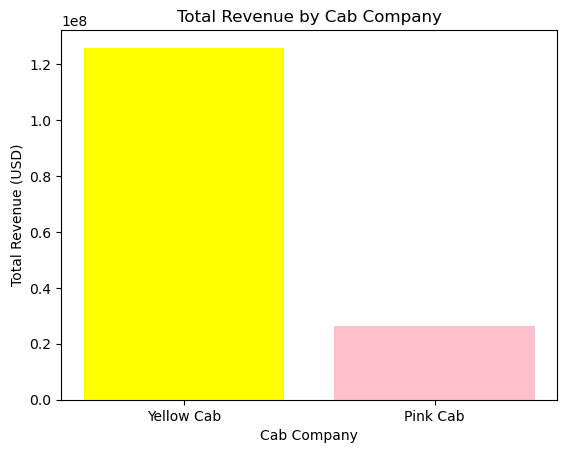

In [16]:
# Calculate the total revenue earned by each cab company
revenue_by_company = cab_data.groupby('Company')['Price Charged'].sum()

#sorting the order to get highest revenue in beginning
revenue_by_company = revenue_by_company.sort_values(ascending=False)

# Define the color map
colors = ['yellow', 'pink']

# Plotting a bar chart to visualize the revenue earned by each cab company
plt.bar(revenue_by_company.index, revenue_by_company.values, color=colors)
plt.xlabel('Cab Company')
plt.ylabel('Total Revenue (USD)')
plt.title('Total Revenue by Cab Company')


plt.show()



* Yellow cab company has highest overall Revenue than the pink cab company.

#### 8. Is there a relationship between population size and the number of cab users in a city?

Correlation coefficient between population and cab users: 0.9154903444756981


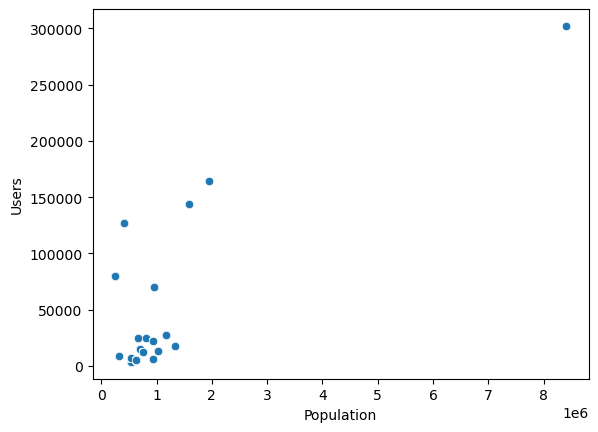

In [48]:
# Create a scatter plot of population vs. cab users
sns.scatterplot(data=Merged_data_set, x="Population", y="Users")

# Calculate the correlation coefficient between population and cab users
correlation_coefficient = Merged_data_set["Population"].corr(Merged_data_set["Users"])

print("Correlation coefficient between population and cab users:", correlation_coefficient)



* this scatter plot shows that positive correlation between population users, hence increase in population has increased cab usage demand

#### 9.Find the number of cab users based on gender.

In [49]:
#pink cab gender count
pink_cab_gender = pink_cab_data.groupby('Gender')['Gender'].count()
print(pink_cab_gender)

#yellow cab gender count
yellow_cab_gender = yellow_cab_data.groupby('Gender')['Gender'].count()
print(yellow_cab_gender)

Gender
Female    37480
Male      47231
Name: Gender, dtype: int64
Gender
Female    116000
Male      158681
Name: Gender, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_10980\1212185469.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k'])


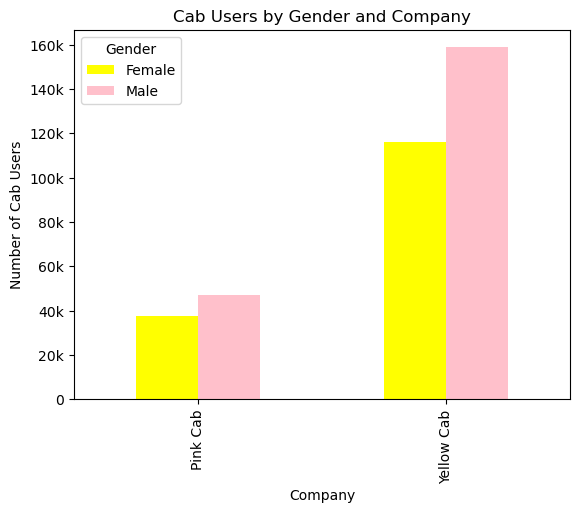

In [52]:
# Creating a pivot table to count the number of cab users by gender and company
gender_pivot = Merged_data_set.pivot_table(index='Company', columns='Gender', values='Customer ID', aggfunc='count')

# Define the color map
colors = ['yellow', 'pink']

# Create the bar chart
ax = gender_pivot.plot(kind='bar', stacked=False, color=colors)
plt.title('Cab Users by Gender and Company')
plt.xlabel('Company')
plt.ylabel('Number of Cab Users')
ax.set_yticklabels(['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k'])
plt.show()


* From the above chart, it can be observed that among both genders, males have used cabs more frequently than females.